In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset

In [5]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Split into target and Features

In [6]:
X = df.iloc[:,2:4].values
y = df.iloc[:,-1].values

# apply feature scaling
not important for Decision tree and Random Forest

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Train Test Spliting

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.75,random_state=50)

# Apply Random Forest algorithm with best ccp value

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf_model = RandomForestClassifier(n_estimators=10,random_state=0,ccp_alpha=0.00723)
rf_model.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.00723, n_estimators=10, random_state=0)

# Accuracy testing with ROC AUC curve

In [88]:
y_pred = rf_model.predict(X_test)

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
accuracy_score(y_test,y_pred)

0.96

In [90]:
confusion_matrix(y_test,y_pred)

array([[68,  2],
       [ 2, 28]], dtype=int64)

In [59]:
y_pred1 = rf_model.predict(X_train)

In [60]:
accuracy_score(y_train,y_pred1)

0.91

# Model Visualization

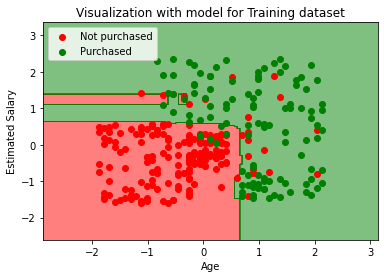

In [61]:
#Visualization for training dataset
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, rf_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))

plt.scatter(X_set[y_set==0,0],X_set[y_set==0,1],color="red",label="Not purchased")
plt.scatter(X_set[y_set==1,0],X_set[y_set==1,1],color="green",label="Purchased")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.title("Visualization with model for Training dataset")
plt.show()

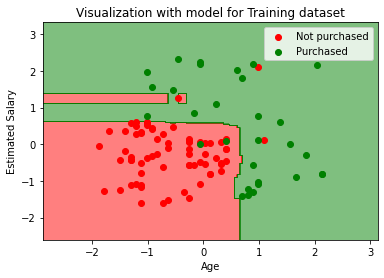

In [63]:
#Visualization for testing dataset
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test


X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, rf_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))

plt.scatter(X_set[y_set==0,0],X_set[y_set==0,1],color="red",label="Not purchased")
plt.scatter(X_set[y_set==1,0],X_set[y_set==1,1],color="green",label="Purchased")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.title("Visualization with model for Training dataset")
plt.show()

# User Testing

test with new user: age is 30 year old, and salary is 60000;

find out that customer have a car or not

and a function for that

In [80]:
user = np.array([[50,60000]])

In [81]:
sc.mean_

array([3.76550e+01, 6.97425e+04])

In [82]:
sc.scale_

array([1.04697648e+01, 3.40543124e+04])

In [83]:
(30-3.76550e+01)/1.04697648e+01

-0.7311530054619757

In [84]:
new_user = sc.transform(user)

In [85]:
user_pred = rf_model.predict(new_user)
user_pred

array([1], dtype=int64)

In [86]:
def prediction(age,salary):
    user = np.array([[age,salary]])
    new_user = sc.transform(user)
    user_pred = rf_model.predict(new_user)
    
    if int(user_pred)==0:
        return "Person don't have a car"
    else:
        return "Person have a car"

In [87]:
prediction(30,150000)

'Person have a car'